In [1]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random
import operator

In [10]:
df_reembolso_detalhado = pd.read_csv('/home/gustavo/Downloads/Redes/Tabelas_Gerada/reembolso_detalhado.csv', delimiter = ',')

In [3]:
#Tabela 1
df_reembolso_detalhado.sort_values('nome_completo')

,partido,uf,num_agente_politico,descricao,fornecedor,cnpj_cpf_empresa,soma_valor_reembolso,qtde_reembolsos,nome_completo
18043,DEM,SP,160532.0,CONSULTORIAS PESQUISAS E TRABALHOS TÉCNICOS.,"T2 COMUNICACAO, VIDEO E PRODUCOES EIRELI - EPP",237.210.170/0013-3,3000.00,1,ADRIANO ELI CORREA
18031,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,SAO JOAO POSTOS DE ABAST E SERV. LTDA,371.304.810/0016-0,1376.78,5,ADRIANO ELI CORREA
18030,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,SABIA POSTO DE SERVIÇOS,059.154.680/0012-0,185.26,2,ADRIANO ELI CORREA
18029,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,REDE VIP - COM VAREJISTA DE COMBUSTIVEIS LTDA,110.170.870/0012-6,480.25,4,ADRIANO ELI CORREA
18028,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,PROTOTIPO AUTO POSTO LTDA,439.008.510/0010-1,784.13,7,ADRIANO ELI CORREA
18027,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,POSTO PRINCESA ISABEL,614.358.710/0012-2,50.00,1,ADRIANO ELI CORREA
18026,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,POSTO E SERVIÇO MONTE CARLO LTDA.,613.280.920/0012-8,60.01,1,ADRIANO ELI CORREA
18025,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,POSTO DISBRAVE IMPERIAL LTDA,107.500.390/0018-0,2200.97,15,ADRIANO ELI CORREA
18024,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,POSTO DE SEVIÇOS JURUCÊ LTDA,617.864.550/0017-9,848.61,11,ADRIANO ELI CORREA
18032,DEM,SP,160532.0,COMBUSTÍVEIS E LUBRIFICANTES.,SAO JOAO POSTOS DE ABAST E SERV. LTDA,371.304.810/0016-0,2378.52,8,ADRIANO ELI CORREA


In [11]:
df_reembolso_detalhado['num_agente_politico'].nunique()

844

In [27]:
df_reembolso_detalhado['descricao'] = df_reembolso_detalhado['descricao'].apply(lambda x: x.replace(",", ""))
df_reembolso_detalhado['descricao'] = df_reembolso_detalhado['descricao'].apply(lambda x: x.replace("'", ""))
df_reembolso_detalhado['descricao'] = df_reembolso_detalhado['descricao'].apply(lambda x: x.replace(".", ""))

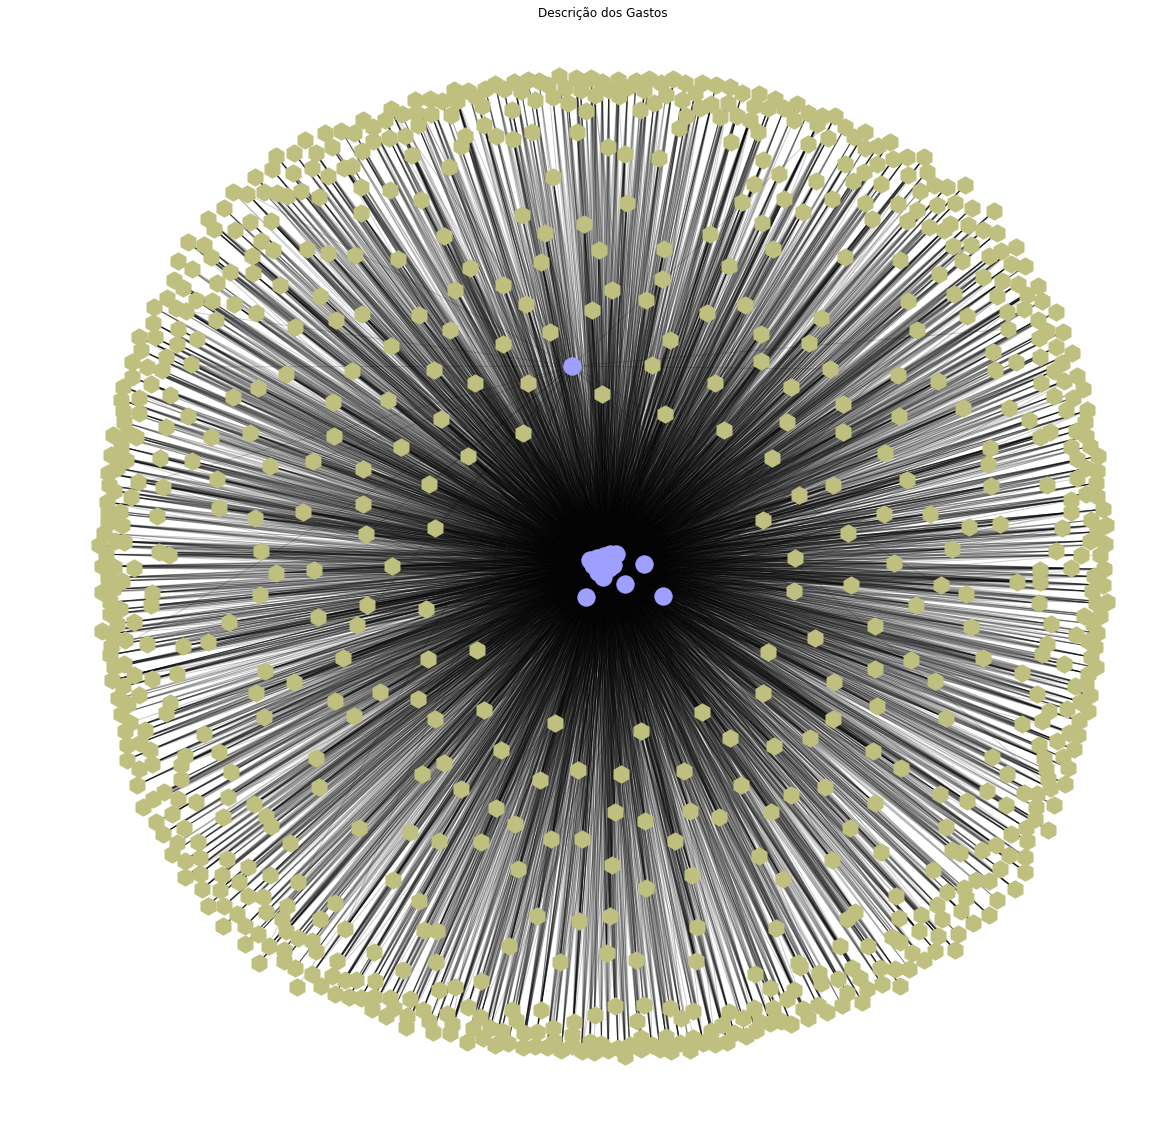

In [28]:
G = nx.Graph()
G.add_nodes_from(df_reembolso_detalhado['descricao'], bipartite = 1)
descricao = [v for v in G.nodes if G.nodes[v]['bipartite'] == 1]

G.add_nodes_from(df_reembolso_detalhado['num_agente_politico'], bipartite = 0)
nome = [v for v in G.nodes if G.nodes[v]['bipartite'] == 0]

G.add_edges_from(df_reembolso_detalhado[['descricao', 'num_agente_politico']].values)
pos = nx.spring_layout(G, k = 0.9)                                       

plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(G, pos, nodelist = nome, node_color='#bfbf7f', node_shape="h", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist = descricao, node_color='#9f9fff', node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title('Descrição dos Gastos')
plt.axis('off')
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Descricao_Gastos.png')
plt.show()


In [29]:
df_reembolso_detalhado['descricao'].nunique()

18

In [30]:
df_reembolso_detalhado['nome_completo'].nunique()

251

In [31]:
df_reembolso_detalhado['num_agente_politico'].nunique()

844

In [32]:
G.number_of_nodes()

862

In [33]:
G.number_of_edges()

8717

In [34]:
dic = dict(nx.degree(G))

In [38]:
nx.density(G)

0.023490195127340734

In [44]:
dic = dict(nx.degree(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dic = dict(dic)

In [53]:
int_keyed_values = [v for k,v in dic.items() if type(k) is float]
str_keyed_values = [v for k,v in dic.items() if type(k) is str]

int_mean = sum(int_keyed_values)/len(int_keyed_values)
str_mean = sum(str_keyed_values)/len(str_keyed_values)
print(int_mean)
print(str_mean)

10.328199052132701
484.27777777777777


In [19]:
nx.density(G)

0.02559801556789096

In [36]:
#Distribuição de grau
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

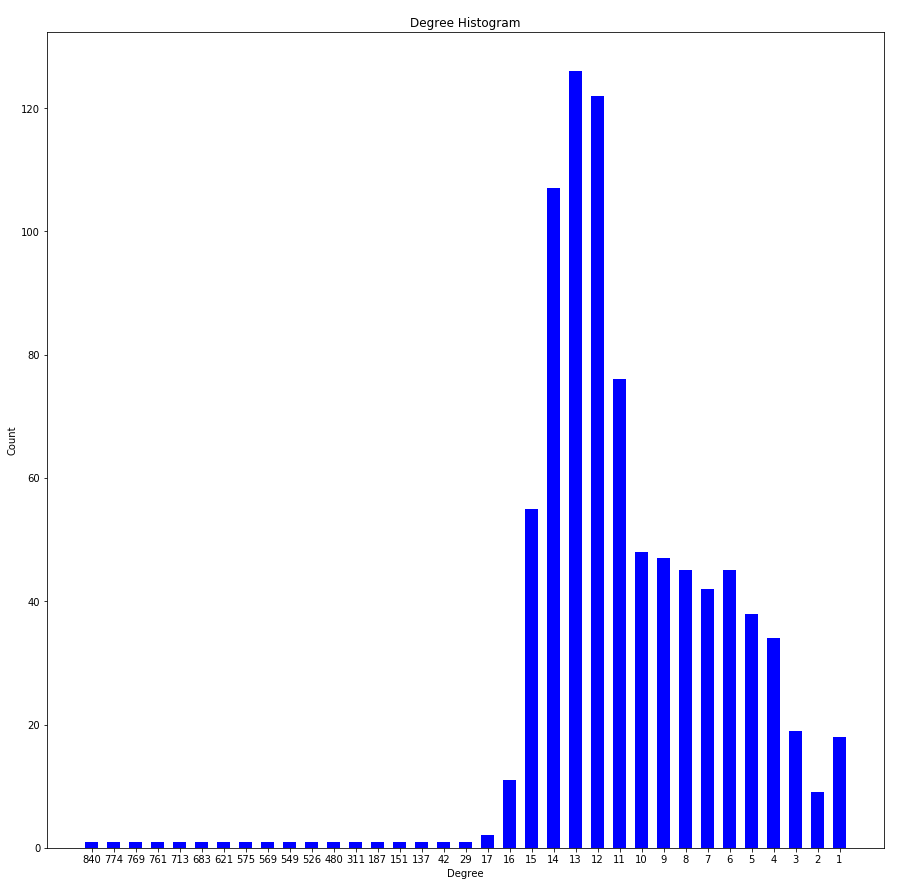

In [37]:
fig, ax = plt.subplots(figsize=(15,15))
plt.bar(range(len(deg)), cnt, width=0.6, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks(range(len(deg)))
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
plt.axis('off')
'''
nx.draw_networkx_nodes(G, pos, nodelist = nome, node_color='#bfbf7f', node_shape="h", node_size=10)
nx.draw_networkx_nodes(G, pos, nodelist = descricao, node_color='#9f9fff', node_size=10)
nx.draw_networkx_edges(G, pos = nx.kamada_kawai_layout(G), alpha=0.4)
'''
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Histogram_Servicos.png')
plt.show()

In [18]:
dic = dict(nx.degree_centrality(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)

In [23]:
total_int = 0
total_str = 0
count_int = 0
count_str = 0
for keys,values in dic.items():
    if type(keys) is int : #checking the key is int 
        count_int +=  1
        total_int += keys
    elif type(keys) is str: 
        count_str +=  1
        total_str += ord(keys)

print(total_int/count_int) # will print int avg
print(total_str/count_str) # will print str avg


AttributeError: 'list' object has no attribute 'items'

In [40]:
dic = nx.degree_centrality(G)
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dict(dic)

{'TELEFONIA': 0.975609756097561,
 'SERVIÇOS POSTAIS': 0.8989547038327527,
 'Emissão Bilhete Aéreo': 0.8931475029036005,
 'COMBUSTÍVEIS E LUBRIFICANTES': 0.883855981416957,
 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR': 0.8281068524970964,
 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR': 0.7932636469221835,
 'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES': 0.7212543554006968,
 'CONSULTORIAS PESQUISAS E TRABALHOS TÉCNICOS': 0.667828106852497,
 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR': 0.6608594657375145,
 'PASSAGENS AÉREAS': 0.6376306620209059,
 'HOSPEDAGEM EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL': 0.610917537746806,
 'SERVIÇO DE TÁXI PEDÁGIO E ESTACIONAMENTO': 0.5574912891986062,
 'ASSINATURA DE PUBLICAÇÕES': 0.3612078977932636,
 'PASSAGENS TERRESTRES MARÍTIMAS OU FLUVIAIS': 0.21718931475029035,
 'SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA': 0.1753774680603949,
 'LOCAÇÃO OU FRETAMENTO DE AERONAVES': 0.15911730545876887,
 'PARTICIPAÇÃO EM CURSO PALESTRA OU EVENTO